Import Libraries and Datasets:-

. Pandas – This library helps to load the data frame in a  2D array format and has multiple functions to perform analysis tasks in one go.
. Numpy – Numpy arrays are very fast and can perform large  computations in a very short time.
. Matplotlib/Seaborn/Wordcloud– This library is used to draw visualizations.
. NLTK – Natural Language Tool Kit provides various functions to process the raw textual data.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vanra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Load Dataset


In [14]:
df = pd.read_csv(r'E:\fake news detection\data.csv')
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [15]:
df.shape

(24783, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


Ploting of Non-Null Values 

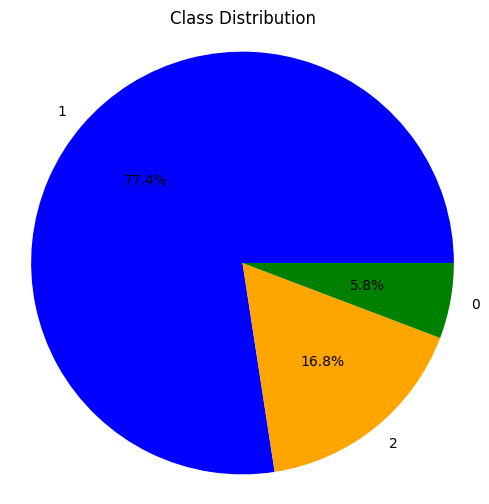

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(df['class'].value_counts().values, 
        labels=df['class'].value_counts().index, 
        autopct='%1.1f%%',   
        colors=['blue', 'orange', 'green'])  

plt.title("Class Distribution")  # Add title
plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.show()

Lables For Following Chart:- 

0 - Hate Speech

1 - Offensive Language

2 - Neither

Text Preprocessing:-

. Stopwords Removal

. Punctuations Removal

. Stemming or Lemmatization

In [18]:
df['tweet'] = df['tweet'].str.lower()


punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()


,class,tweet
0,2,rt mayasolovely as a woman you shouldnt compl...
1,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,1,rt cganderson vivabased she look like a tranny
4,1,rt shenikaroberts the shit you hear about me ...


In [19]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    for word in str(text).split():

        if word not in stop_words:

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,class,tweet
0,2,rt mayasolovely woman shouldnt complain cleani...
1,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,1,rt cganderson vivabased look like tranny
4,1,rt shenikaroberts shit hear might true might f...


WorldCloud


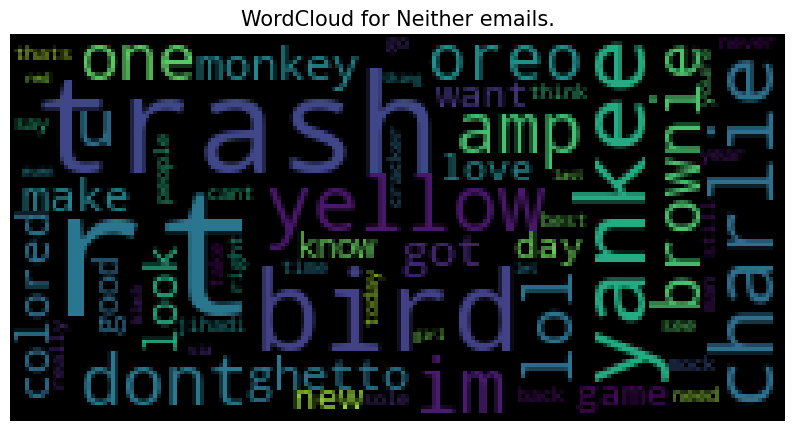

In [20]:
def plot_word_cloud(data, typ):
  email_corpus = " ".join(data['tweet'])

  plt.figure(figsize = (10,10))
  
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
  
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==2], typ='Neither')

As we know from above that the data we had was highly imbalanced now we will solve this problem by using a mixture of down sampling and up sampling.

In [21]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)


Now let’s check what is the data distribution in the three classes.

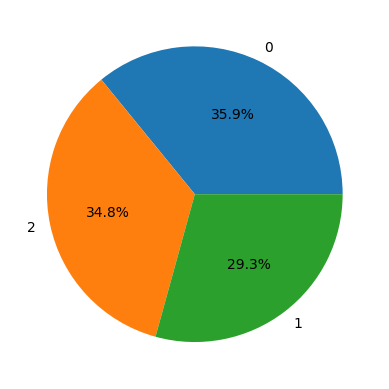

In [22]:
plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()


Word2Vec Conversion:-

We cannot feed words to a machine learning model because they work on numbers only. So, first, we will convert the our words to vectors with the token id’s to the corresponding words and after padding them our textual data will arrive to a stage where we can feed it to a model.

In [23]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape


((9562,), (2391,))

In [24]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape


((9562, 3), (2391, 3))

The labels of the classes have been converted into one-hot-encoded vectors. For this, we will use a vocabulary size of 5000 with each tweet, not more than 100 in length.

In [25]:
max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')

token.fit_on_texts(X_train)


We have fitted the tokenizer on our training data we will use it to convert the training and validation data both to vectors.

In [26]:
max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)

Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

Model Development and Evaluation:-
We will implement a Sequential model which will contain the following parts:

. Three Embedding Layers to learn a featured vector representations of the input vectors.

. A Bidirectional LSTM layer to identify useful patterns in the sequence.

. Then we will have one fully connected layer.
We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.

. The final layer is the output layer which outputs soft probabilities for the three classes. 

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization

MAX_WORDS = 5000  # Vocabulary size
MAX_LEN = 300  # Maximum sequence length
EMBEDDING_DIM = 128  # Embedding vector size


model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),  # ✅ Specify input_length
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')  ])


model.build(input_shape=(None, MAX_LEN))  # ✅ Explicitly define input shape

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()  

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 300, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,043 (3.26 MB)

 Trainable params: 854,787 (3.26 MB)

 Non-trainable params: 256 (1.00 KB)

Callback:- 

Callbacks are used to check whether the model is improving with each epoch or not. 
If not then what are the necessary steps to be taken like ReduceLROnPlateau decreases learning rate further.     
Even then if model performance is not improving then training will be stopped by EarlyStopping. 
We can also define some custom callbacks to stop training in between if the desired results have been obtained early.

In [28]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

from tensorflow.keras.utils import pad_sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len)

history = model.fit(X_train_padded, Y_train,
                    validation_data=(X_val_padded, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])



Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step - accuracy: 0.6888 - loss: 0.7208 - val_accuracy: 0.6909 - val_loss: 0.8186 - learning_rate: 0.0010
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9138 - loss: 0.2643 - val_accuracy: 0.8662 - val_loss: 0.3660 - learning_rate: 0.0010
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.9435 - loss: 0.1703 - val_accuracy: 0.7725 - val_loss: 0.6470 - learning_rate: 0.0010
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9503 - loss: 0.1416 - val_accuracy: 0.8858 - val_loss: 0.3794 - learning_rate: 0.0010
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9697 - loss: 0.1007 - val_accuracy: 0.9097 - val_loss: 0.3150 - learning_rate: 5.0000e-04
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9807 - loss: 0.0768 - val_accuracy: 0.9046 - val_loss: 0.3808 - learning_rate: 5.0000e-04
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.

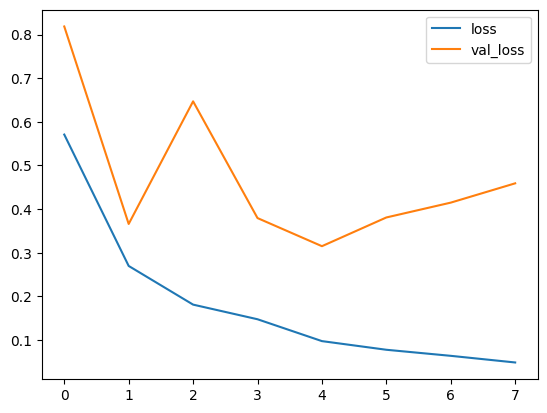

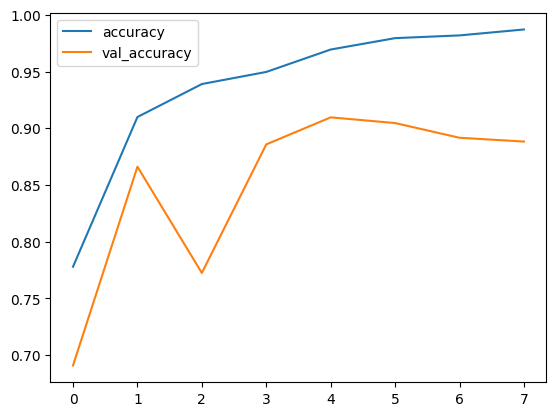

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
